<img src="../images/JHI_STRAP_Web.png" style="width: 150px; float: right;">
# 07 - Programming for `UniProt`

## Table of Contents

1. [Introduction](#introduction)
2. [Python imports](#imports)
3. [Running a remote `UniProt` query](#uniprot)
  1. [Connecting to `UniProt`](#connect)
  2. [Constructing a query](#query)
  3. [Perform the query](#search)
  4. [EXAMPLE: Putting it together](#example01)
4. [Advanced queries](#advanced)
  1. [`key:value` queries](#keyvalue)
  2. [Exercise 01](#ex01)
  3. [Combining queries](#combine)
  4. [Exercise 02](#ex02)  
4. [Processing query results](#processing)
  1. [Tabular](#tabular)
  2. [Excel](#excel)  
  3. [FASTA sequence](#fasta)
  4. [`pandas` dataframe](#pandas)

<a id="introduction"></a>
## Introduction

The `UniProt` browser interface is very powerful, but you will have noticed that even the most complex queries can be converted into a single string that describes the search being made of the `UniProt` databases. This string is generated for you, and placed into the search field at the top of the `UniProt` webpage every time you run a search.

<p></p>
<div class="alert-success">
<b>It can be tedious and time-consuming to point-and-click your way through a large number of browser-based searches, but by using the `UniProt` webservice, the search strings you've already seen, and a Python module called `bioservices`, we can compose and run as many searches as we like using computer code, and pull the results of those searches.</b>
</div>

This notebook presents examples of methods for using `UniProt` programmatically, via a webservice, and you will be controlling the searches using Python code in this notebook.

There are a number of advantages to this approach:

* It is easy to set up repeatable searches for many sequences, or collections of sequences
* It is easy to read in the search results and conduct downstream analyses that add value to your search

Where it is not practical to submit a large number of simultaneous queries via a web form (because it is tiresome to point-and-click over and over again), this can be handled programmatically instead. You have the opportunity to change custom options to help refine your query, compared to the website interface. If you need to repeat a query, it can be trivial to get the same settings every time, if you use a programmatic approach.

<a id="imports"></a>
## Python imports

In [1]:
# Show plots as part of the notebook
%matplotlib inline

# Standard library packages
import io

# Import Seaborn for graphics and plotting
import seaborn as sns

# Import bioservices module, to run remote UniProt queries
from bioservices import UniProt

# Import Pandas, so we can use dataframes
import pandas as pd

<a id="uniprot"></a>
## Running a remote `UniProt` query

<p></p>
<div class="alert-success">
<b>There are three key steps to running a remote `UniProt` query with `bioservices`:</b>
</div>

1. Make a link to the `UniProt` webservice
2. Construct a query string
3. Send the query to `UniProt`, and catch the result in a variable

Once the search result is caught, it can be processed in any way you like, written to a file, or ignored.

<a id="connect"></a>
### Connecting to `UniProt`

To open a connection to `UniProt`, you make an *instance* of the `UniProt()` *class* from `bioservices`. This can be persistent so that, once it is created, you can interact with it over and over again. 

<p></p>
<div class="alert-success">
<b>To make a persistent instance, you can assign `UniProt()` to a variable:</b>
</div>

```python
service = UniProt() # it is good practice to have a meaningful variable name
```

<a id="query"></a>
### Constructing a query

<p></p>
<div class="alert-success">
<b>`UniProt` allows for the construction of complex searches by combining *fields*. A full discussion is beyond the scope of this lesson, but you will have seen in [notebook 06](06-uniprot_browser.ipynb) that the searches you constructed by pointing and clicking on the `UniProt` website were converted into text in the search field at the top. </b>
</div>

To describe the format briefly: there are a set of defined *keys* - keywords that indicate the specific type of data you want to search in (such as `host`, `annotation`, or sequence `length`), and these are combined with a particular *value* you want to search for (such as `mouse`, or `40674`) in a `key:value` pair, separated by a colon, such as `host:mouse` or `ec:3.2.1.23`.

* `UniProt` query fields: [http://www.uniprot.org/help/query-fields](http://www.uniprot.org/help/query-fields)

If you provide a string, instead of a `key:value` pair, `UniProt` will search in all *fields* for your search term.

Programmatically, we construct the query as a *string*, e.g.

```python
query = "Q9AJE3"  # this query means we want to look in all fields for Q9AJE3
```

<a id="search"></a>
### Perform the query

To send the query to `UniProt`, you will use the `.search()` *method* of your active instance of the `UniProt()` *class*. 

<p></p>
<div class="alert-success">
<b>If you have assigned this instance to the variable `service` (as above), then you can run the `query` string as a remote search with the line:</b>
</div>

```python
result = service.search(query)  # Run a query and catch the output in result
```

In the line above, the output of the search (i.e. your results) are stored in a variable called `result`. It is good practice to make variable names short and descriptive - this makes your code easier to read.

<a id="example01"></a>
### EXAMPLE: Putting it together

The code in the cell below uses the example code above to create an instance of the `UniProt()` class, and use it to submit a pre-stored query to the `UniProt` service, then catch the result in a variable called `result`. The `print()` statement then shows us what the result looks like, as returned by the service.

In [2]:
# Make a link to the UniProt webservice
service = UniProt()

# Build a query string
query = "Q9AJE3"

# Send the query to UniProt, and catch the search result in a variable
result = service.search(query)

# Inspect the result
print(result)

Creating directory /Users/lpritc/Library/Caches/bioservices 
Entry	Entry name	Status	Protein names	Gene names	Organism	Length
Q9AJE3	CYC2_KITGR	reviewed	Terpentetriene synthase (EC 4.2.3.36)	cyc2	Kitasatospora griseola (Streptomyces griseolosporeus)	311



The `UniProt()` instance defined in the cell above is *persistent*, so you can reuse it to make another query, as in the cell below:

In [3]:
# Make a new query string, and run a remote search at UniProt
new_query = "Q01844"
new_result = service.search(new_query)

# Inspect the result
print(new_result)

Entry	Entry name	Status	Protein names	Gene names	Organism	Length
Q01844	EWS_HUMAN	reviewed	RNA-binding protein EWS (EWS oncogene) (Ewing sarcoma breakpoint region 1 protein)	EWSR1 EWS	Homo sapiens (Human)	656
Q9NZ81	PRR13_HUMAN	reviewed	Proline-rich protein 13 (Taxane-resistance protein)	PRR13 TXR1 BM-041	Homo sapiens (Human)	148
O95486	SC24A_HUMAN	reviewed	Protein transport protein Sec24A (SEC24-related protein A)	SEC24A	Homo sapiens (Human)	1093
O94855	SC24D_HUMAN	reviewed	Protein transport protein Sec24D (SEC24-related protein D)	SEC24D KIAA0755	Homo sapiens (Human)	1032
Q9UBV8	PEF1_HUMAN	reviewed	Peflin (PEF protein with a long N-terminal hydrophobic domain) (Penta-EF hand domain-containing protein 1)	PEF1 ABP32 UNQ1845/PRO3573	Homo sapiens (Human)	284
Q9NS23	RASF1_HUMAN	reviewed	Ras association domain-containing protein 1	RASSF1 RDA32	Homo sapiens (Human)	344
O15162	PLS1_HUMAN	reviewed	Phospholipid scramblase 1 (PL scramblase 1) (Ca(2+)-dependent phospholipid scramblase 1) (Erythr

<a id="advanced"></a>
## Advanced queries

<p></p>
<div class="alert-success">
<b>The examples above built queries that were simple strings. They did not exploit the `key:value` search structure, or combine search terms. In this section, you will explore some queries that use the `UniProt` query fields, and combine them into powerful, filtering searches.</b>
</div>

<a id="keyvalue"></a>
### `key:value` queries

As noted above (and at [http://www.uniprot.org/help/query-fields](http://www.uniprot.org/help/query-fields)) particular values of specific data can be requested by using `key:value` pairs to restrict searches to named *fields* in the `UniProt` database.

As a first example, you will note that the result returned for the query `"Q01844"` has multiple entries. Only one of these is the sequence with `accession` value equal to `"Q01844"`, but the other entries make reference to this sequence somewhere in their database record. If we want to restrict our result only to the particular entry `"Q01844"`, we can specify the field we want to search as `accession`, and build the following query:

```python
query = "accession:Q01844"  # specify a search on the accession field
```

Note that we can use the same variable name `query` as earlier (this overwrites the previous value in `query`). The code below runs the search and shows the output:

In [4]:
# Make a new query string, and run a remote search at UniProt
query = "accession:Q01844"
result = service.search(query)

# Inspect the result
print(result)

Entry	Entry name	Status	Protein names	Gene names	Organism	Length
Q01844	EWS_HUMAN	reviewed	RNA-binding protein EWS (EWS oncogene) (Ewing sarcoma breakpoint region 1 protein)	EWSR1 EWS	Homo sapiens (Human)	656



<div class="alert-success">
<b>By using this and other `key:value` constructions, we can refine our searches to give us only the entries we're interested in</b>
</div>

<img src="../images/exercise.png" style="width: 100px; float: left;">
<a id="ex01"></a>
### Exercise 01 (10min)

Using `key:value` searches, can you find and download sets of entries for proteins that satisfy the following requirements? (**HINT:** this <a href="http://www.uniprot.org/help/query-fields">link</a> to the `UniProt` query fields may be helpful, here):

<p></p>
<div class="alert-danger">
<ul>
<li> Have publications authored by someone with the surname Broadhurst
<li> Have protein length between 9000aa and 9010aa
<li> Derive from the taipan snake
<li> Have been found in the wing
</ul>
</div>

In [5]:
# SOLUTION - EXERCISE 01
queries = ["author:broadhurst", "length:[9000 TO 9010]", "organism:taipan", "tissue:wing"]

for query in queries:
    print("\n%s" % query)
    print("=" * len(query))
    result = service.search(query)
    print(result)


author:broadhurst
Entry	Entry name	Status	Protein names	Gene names	Organism	Length
P83917	CBX1_MOUSE	reviewed	Chromobox protein homolog 1 (Heterochromatin protein 1 homolog beta) (HP1 beta) (Heterochromatin protein p25) (M31) (Modifier 1 protein)	Cbx1 Cbx	Mus musculus (Mouse)	185
P03956	MMP1_HUMAN	reviewed	Interstitial collagenase (EC 3.4.24.7) (Fibroblast collagenase) (Matrix metalloproteinase-1) (MMP-1) [Cleaved into: 22 kDa interstitial collagenase; 27 kDa interstitial collagenase]	MMP1 CLG	Homo sapiens (Human)	469
P0AFG6	ODO2_ECOLI	reviewed	Dihydrolipoyllysine-residue succinyltransferase component of 2-oxoglutarate dehydrogenase complex (EC 2.3.1.61) (2-oxoglutarate dehydrogenase complex component E2) (OGDC-E2) (Dihydrolipoamide succinyltransferase component of 2-oxoglutarate dehydrogenase complex)	sucB b0727 JW0716	Escherichia coli (strain K12)	405
P10515	ODP2_HUMAN	reviewed	Dihydrolipoyllysine-residue acetyltransferase component of pyruvate dehydrogenase complex, mitochondrial (



tissue:wing
Entry	Entry name	Status	Protein names	Gene names	Organism	Length
P08879	NDKA_DROME	reviewed	Nucleoside diphosphate kinase (NDK) (NDP kinase) (EC 2.7.4.6) (Abnormal wing disks protein) (Killer of prune protein)	awd K-pn CG2210	Drosophila melanogaster (Fruit fly)	153
P17336	CATA_DROME	reviewed	Catalase (EC 1.11.1.6)	Cat CG6871	Drosophila melanogaster (Fruit fly)	506
P11147	HSP7D_DROME	reviewed	Heat shock 70 kDa protein cognate 4 (Heat shock 70 kDa protein 88E)	Hsc70-4 Hsc4 CG4264	Drosophila melanogaster (Fruit fly)	651
Q24342	FNG_DROME	reviewed	Fringe glycosyltransferase (EC 2.4.1.222) (O-fucosylpeptide 3-beta-N-acetylglucosaminyltransferase)	fng CG10580	Drosophila melanogaster (Fruit fly)	412
P29613	TPIS_DROME	reviewed	Triosephosphate isomerase (TIM) (EC 5.3.1.1) (Triose-phosphate isomerase)	Tpi CG2171	Drosophila melanogaster (Fruit fly)	247
P35381	ATPA_DROME	reviewed	ATP synthase subunit alpha, mitochondrial (Protein bellwether)	blw ATPSYN-ALPHA CG3612	Drosophila melanoga

<a id="combine"></a>
### Combining queries

<p></p>
<div class="alert-success">
<b>Combining terms in a `UniProt` query can be as straightforward as putting them in the same string, separated by a space.</b>
</div>

For example:

```python
query = "organism:rabbit tissue:eye"
```

will search for all entries deriving from rabbits that are found in the eye

In [6]:
# Combine queries for rabbit (organism) and eye (tissue), and search
query = "organism:rabbit tissue:eye"
result = service.search(query)
print(result)

Entry	Entry name	Status	Protein names	Gene names	Organism	Length
Q866N2	MYOC_RABIT	reviewed	Myocilin (Trabecular meshwork-induced glucocorticoid response protein) [Cleaved into: Myocilin, N-terminal fragment (Myocilin 20 kDa N-terminal fragment); Myocilin, C-terminal fragment (Myocilin 35 kDa N-terminal fragment)]	MYOC TIGR	Oryctolagus cuniculus (Rabbit)	490
P14755	CRYL1_RABIT	reviewed	Lambda-crystallin (EC 1.1.1.45) (L-gulonate 3-dehydrogenase) (Gul3DH)	CRYL1 GUL3DH	Oryctolagus cuniculus (Rabbit)	319
A4L9J0	MIP_RABIT	reviewed	Lens fiber major intrinsic protein (Aquaporin-0)	MIP	Oryctolagus cuniculus (Rabbit)	263
Q9TV70	DHDH_RABIT	reviewed	Trans-1,2-dihydrobenzene-1,2-diol dehydrogenase (EC 1.3.1.20) (D-xylose 1-dehydrogenase) (D-xylose-NADP dehydrogenase) (EC 1.1.1.179) (Dimeric dihydrodiol dehydrogenase) (Ory2DD) (Fragment)	DHDH 2DD	Oryctolagus cuniculus (Rabbit)	329
P41316	CRYAB_RABIT	reviewed	Alpha-crystallin B chain (Alpha(B)-crystallin)	CRYAB	Oryctolagus cuniculus (Rabbit)	175
P0

<img src="../images/exercise.png" style="width: 100px; float: left;">
<a id="ex02"></a>
### Exercise 02 (10min)

Using `key:value` searches, can you find and download sets of entries for proteins that satisfy the following requirements? (**HINT:** this <a href="http://www.uniprot.org/help/query-fields">link</a> to the `UniProt` query fields may be helpful, here):

<p></p>
<div class="alert-danger">
<ul>
<li> Found in sheep spleen
<li> Have "rxlr" in their name, have a publication with author name Pritchard, and are between 70aa and 80aa in length
<li> Derive from a quokka and have had their annotations manually reviewed
<li> Are found in cell membranes of horse heart tissue, and have had their annotations manually reviewed
</ul>
</div>

In [7]:
# SOLUTION - EXERCISE 02
queries = ["organism:sheep tissue:spleen",
           "author:pritchard name:rxlr length:[70 TO 80]",
           "organism:quokka reviewed:yes",
           "go:membrane organism:horse tissue:heart reviewed:yes"]

for query in queries:
    print("\n%s" % query)
    print("=" * len(query))
    result = service.search(query)
    print(result)


organism:sheep tissue:spleen
Entry	Entry name	Status	Protein names	Gene names	Organism	Length
P23907	PRIO_SHEEP	reviewed	Major prion protein (PrP) (CD antigen CD230)	PRNP PRP SIP	Ovis aries (Sheep)	256
Q95229	PDGFB_SHEEP	reviewed	Platelet-derived growth factor subunit B (PDGF subunit B) (PDGF-2) (Platelet-derived growth factor B chain) (Platelet-derived growth factor beta polypeptide)	PDGFB	Ovis aries (Sheep)	241
Q5I2M4	TLR9_SHEEP	reviewed	Toll-like receptor 9 (CD antigen CD289)	TLR9	Ovis aries (Sheep)	1029
O77727	K1C15_SHEEP	reviewed	Keratin, type I cytoskeletal 15 (Cytokeratin-15) (CK-15) (Keratin-15) (K15)	KRT15	Ovis aries (Sheep)	453
A2P2I3	A2P2I3_SHEEP	unreviewed	VH region (Fragment)	VH	Ovis aries (Sheep)	142
A2P2G3	A2P2G3_SHEEP	unreviewed	VH region (Fragment)	VH	Ovis aries (Sheep)	142
A2P2I1	A2P2I1_SHEEP	unreviewed	VH region (Fragment)	VH	Ovis aries (Sheep)	145
A2P2H2	A2P2H2_SHEEP	unreviewed	VH region (Fragment)	VH	Ovis aries (Sheep)	144
A2P2I2	A2P2I2_SHEEP	unreviewed	VH region 

<a id="boolean"></a>
### Combining terms with Boolean logic

Boolean logic allows you to combine search terms with each other in arbitrary ways using three *operators*, specifying whether:

* both terms are required (`AND`) **NOTE:** this is implicitly what you have been doing in the examples above
* either term is allowed (`OR`)
* a term is disallowed (`NOT`)

Searches are read from left-to right, but the logic of a search can be controlled by placing the combinations you want to resolve first in parentheses (`()`). Combining these operators can build some extremely powerful searches. For example, to get all proteins from horses and sheep, identified in the ovary, and having length greater than 200aa, you could use the query:

```
query = "tissue:ovary AND (organism:sheep OR organism:horse) NOT length:[1 TO 200]"
```

<a id="processing"></a>
## Processing query results

So far you have worked with the default output from `bioservices`, although you know from [`notebook 06`](06-uniprot_browser.ipynb) that `UniProt` can provide output in a number of useful formats for searches in the browser.

The default output is `tabular`, and gives a good idea of the nature and content of the entries you recover. In this section, you will see some ways to download search results in alternative formats, which can be useful for analysis.

All the output format options are controlled in a similar way, using the `frmt=<format>` argument when you conduct your search - with `<format>` being one of the allowed terms (see the [`bioservices` documentation](https://pythonhosted.org/bioservices/references.html#module-bioservices.uniprot) for a full list.

<a id="tabular"></a>
### Tabular

<p></p>
<div class="alert-success">
<b>The default datatype is the most flexible datatype for download: <i>tabular</i>.</b>
</div>

This can be specified explicitly with the `tab` format:

```python
result = service.search(query, frmt="tab")
```

In [8]:
# Make a query string, and run a remote search at UniProt,
# getting the result as tabular format
query = "Q01844"
result = service.search(query, frmt="tab")

# Inspect the result
print(result)

Entry	Entry name	Status	Protein names	Gene names	Organism	Length
Q01844	EWS_HUMAN	reviewed	RNA-binding protein EWS (EWS oncogene) (Ewing sarcoma breakpoint region 1 protein)	EWSR1 EWS	Homo sapiens (Human)	656
Q9NZ81	PRR13_HUMAN	reviewed	Proline-rich protein 13 (Taxane-resistance protein)	PRR13 TXR1 BM-041	Homo sapiens (Human)	148
O95486	SC24A_HUMAN	reviewed	Protein transport protein Sec24A (SEC24-related protein A)	SEC24A	Homo sapiens (Human)	1093
O94855	SC24D_HUMAN	reviewed	Protein transport protein Sec24D (SEC24-related protein D)	SEC24D KIAA0755	Homo sapiens (Human)	1032
Q9UBV8	PEF1_HUMAN	reviewed	Peflin (PEF protein with a long N-terminal hydrophobic domain) (Penta-EF hand domain-containing protein 1)	PEF1 ABP32 UNQ1845/PRO3573	Homo sapiens (Human)	284
Q9NS23	RASF1_HUMAN	reviewed	Ras association domain-containing protein 1	RASSF1 RDA32	Homo sapiens (Human)	344
O15162	PLS1_HUMAN	reviewed	Phospholipid scramblase 1 (PL scramblase 1) (Ca(2+)-dependent phospholipid scramblase 1) (Erythr

By default, the columns that are returned are: `Entry`, `Entry name`, `Status`, `Protein names`, `Gene names`, `Organism`, and `Length`. But these can be modified by passing the `columns=<list>` argument, where the `<list>` is a comma-separated list of column names. For example:

```python
columnlist = "id,entry name,length,organism,mass,domains,domain,pathway"
result = service.search(query, frmt="tab", columns=columnlist)
```

The list of allowed column names can be found by inspecting the content of the variable `service._valid_columns`.

In [9]:
# Make a query string
query = "Q01844"

# Define a list of columns we want to retrive
columnlist = "id,entry name,length,mass,go(cellular component)"

# Run the remote search
result = service.search(query, frmt="tab", columns=columnlist)

# View the result
print(result)

Entry	Entry name	Length	Mass	Gene ontology (cellular component)
Q01844	EWS_HUMAN	656	68,478	cytoplasm [GO:0005737]; nucleolus [GO:0005730]; nucleus [GO:0005634]; plasma membrane [GO:0005886]
Q9NZ81	PRR13_HUMAN	148	15,385	cytosol [GO:0005829]; nucleoplasm [GO:0005654]
O95486	SC24A_HUMAN	1093	119,749	COPII vesicle coat [GO:0030127]; cytosol [GO:0005829]; endoplasmic reticulum membrane [GO:0005789]; ER to Golgi transport vesicle membrane [GO:0012507]; Golgi membrane [GO:0000139]
O94855	SC24D_HUMAN	1032	113,010	COPII vesicle coat [GO:0030127]; cytosol [GO:0005829]; endoplasmic reticulum membrane [GO:0005789]; ER to Golgi transport vesicle membrane [GO:0012507]; Golgi membrane [GO:0000139]
Q9UBV8	PEF1_HUMAN	284	30,381	COPII vesicle coat [GO:0030127]; cytoplasm [GO:0005737]; endoplasmic reticulum [GO:0005783]; extracellular exosome [GO:0070062]; Golgi membrane [GO:0000139]
Q9NS23	RASF1_HUMAN	344	39,219	cytoplasm [GO:0005737]; microtubule [GO:0005874]; microtubule cytoskeleton [GO:0015630]; m

#### Converting to a dataframe

<p></p>
<div class="alert-success">
<b>The `pandas` module allows us to process tabular data into dataframes, just like in `R`.</b>
</div>

To do this, we have to use the `io.StringIO()` class to make it think that our downloaded results are a file

```python
df = pd.read_table(io.StringIO(result))
```

In [10]:
# Convert the last saerch result into a dataframe in Pandas
df = pd.read_table(io.StringIO(result))

# View the dataframe
df

,Entry,Entry name,Length,Mass,Gene ontology (cellular component)
0,Q01844,EWS_HUMAN,656,"68,478",cytoplasm [GO:0005737]; nucleolus [GO:0005730]...
1,Q9NZ81,PRR13_HUMAN,148,"15,385",cytosol [GO:0005829]; nucleoplasm [GO:0005654]
2,O95486,SC24A_HUMAN,1093,"119,749",COPII vesicle coat [GO:0030127]; cytosol [GO:0...
3,O94855,SC24D_HUMAN,1032,"113,010",COPII vesicle coat [GO:0030127]; cytosol [GO:0...
4,Q9UBV8,PEF1_HUMAN,284,"30,381",COPII vesicle coat [GO:0030127]; cytoplasm [GO...
5,Q9NS23,RASF1_HUMAN,344,"39,219",cytoplasm [GO:0005737]; microtubule [GO:000587...
6,O15162,PLS1_HUMAN,318,"35,049",cytosol [GO:0005829]; extracellular exosome [G...
7,Q99873,ANM1_HUMAN,361,"41,516",cytoplasm [GO:0005737]; cytosol [GO:0005829]; ...
8,P35637,FUS_HUMAN,526,"53,426",dendritic spine head [GO:0044327]; nucleoplasm...
9,Q92993,KAT5_HUMAN,513,"58,582",NuA4 histone acetyltransferase complex [GO:003...


Doing this will produce a `pandas` dataframe that can be manipulated and analysed just like any other dataframe. We can, for instance, view a histogram of sequence lengths from the table above:

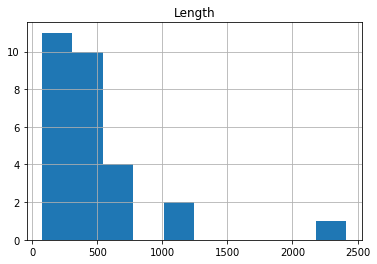

In [11]:
# Plot histogram from dataframe
df.hist();

<a id="excel"></a>
### Excel

<p></p>
<div class="alert-success">
<b>You can download Excel spreadsheets directly from `UniProt`, just as with the browser interface.</b>
</div>

```python
result = service.search(query, frmt="xls")
```

You can't use the Excel output directly in your code without some file manipulation, and you'll have to save it to a file, as in the example below. Also, the downloaded format is not guaranteed to be current for your version of Excel, and the application may ask to repair it. But, if you want Excel output to share with/display to others, you can get it programmatically.

<p></p>
<div class="alert-danger">
<b>NOTE: the downloaded format is actually `.xlsx`, rather than `.xls` which is implied by the format</b>
</div>

In [12]:
# Make a query string, and run a remote search at UniProt,
# getting the result as an Excel spreadsheer
query = "Q01844"
result = service.search(query, frmt="xls")

# Write the Excel spreadsheet to file
outfile = 'output/uniprot/Q01844.xlsx'
with open(outfile, 'wb') as ofh:
    ofh.write(result)

<a id="fasta"></a>
### FASTA sequence

<p></p>
<div class="alert-success">
<b>If you're interested only in the FASTA format sequence for an entry, you can use the `fasta` option with `frmt` to recover the sequences directly, as in the example below:</b>
</div>

In [13]:
# Make a query string, and run a remote search at UniProt,
# getting the result as FASTA sequence
query = "go:membrane organism:horse tissue:heart reviewed:yes"
result = service.search(query, frmt="fasta")

# Inspect the result
print(result)

>sp|P00004|CYC_HORSE Cytochrome c OS=Equus caballus GN=CYCS PE=1 SV=2
MGDVEKGKKIFVQKCAQCHTVEKGGKHKTGPNLHGLFGRKTGQAPGFTYTDANKNKGITW
KEETLMEYLENPKKYIPGTKMIFAGIKKKTEREDLIAYLKKATNE
>sp|P27104|ANF_HORSE Natriuretic peptides A OS=Equus caballus GN=NPPA PE=2 SV=1
MGSFSTIMASFLLFLAFQLQGQTRANPVYGSVSNGDLMDFKNLLDRLEDKMPLEDEVMPP
QVLSDQSEEERAALSPLPEVPPWTGEVNPAQRDGGALGRGSWDSSDRSALLKSKLRALLA
APRSLRRSSCFGGRMDRIGAQSGLGCNSFRYRR
>sp|P68082|MYG_HORSE Myoglobin OS=Equus caballus GN=MB PE=1 SV=2
MGLSDGEWQQVLNVWGKVEADIAGHGQEVLIRLFTGHPETLEKFDKFKHLKTEAEMKASE
DLKKHGTVVLTALGGILKKKGHHEAELKPLAQSHATKHKIPIKYLEFISDAIIHVLHSKH
PGDFGADAQGAMTKALELFRNDIAAKYKELGFQG



<a id="pandas"></a>
### `pandas` dataframe

<p></p>
<div class="alert-success">
<b>In addition to the conversion of tabular output to a `pandas` dataframe above, you can ask the `UniProt()` instance to return a `pandas` dataframe directly, with the `.get_df()` method.</b>
</div>

```python
result = service.get_df(query)
```

For a single ID, it's possible to pass the ID directly, for example:

In [14]:
# Get a dataframe for a single accession ID
df = service.get_df('tissue:venom (organism:snake OR organism:mamba)')

# View the dataframe
df.head()

/Users/lpritc/anaconda3/envs/2018-03-06-ibioic/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2850: DtypeWarning: Columns (2,3,4,17,18,21,23,24,28,29,30,33,34,38,39,40,41,42,43,44,45,46,47,49,50,51,52,53,54,56,57,58,59,60,61,62,63,64,65,66,67,68,69,71,72,73,78,79,80,81,82,85,88,89,90,91,95,97,99,104,105,106,107,108,109,110,111,112,113,114,115,116,144) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


,Entry,Entry name,Gene names,Gene names (primary ),Gene names (synonym ),Gene names (ordered locus ),Gene names (ORF ),Organism,Organism ID,Protein names,...,Taxonomic lineage IDs (GENUS),Taxonomic lineage IDs (SUBGENUS),Taxonomic lineage IDs (SPECIES GROUP),Taxonomic lineage IDs (SPECIES SUBGROUP),Taxonomic lineage IDs (SPECIES),Taxonomic lineage IDs (SUBSPECIES),Taxonomic lineage IDs (VARIETAS),Taxonomic lineage IDs (FORMA),Cross-reference (db_abbrev),Cross-reference (EMBL)
0,P0DKR6,3SX1_DENPO,[],NaN,NaN,NaN,NaN,Dendroaspis polylepis polylepis (Black mamba),8620,Mambalgin-1 (Mamb-1) (Pi-Dp1),...,8617,NaN,NaN,NaN,8624.0,NaN,NaN,NaN,NaN,JX428743;
1,P0C1Z0,3SE2_DENAN,[],NaN,NaN,NaN,NaN,Dendroaspis angusticeps (Eastern green mamba) ...,8618,Fasciculin-2 (Fas-2) (Fas2) (Acetylcholinester...,...,8617,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,P00981,VKTHK_DENPO,[],NaN,NaN,NaN,NaN,Dendroaspis polylepis polylepis (Black mamba),8620,Kunitz-type serine protease inhibitor homolog ...,...,8617,NaN,NaN,NaN,8624.0,NaN,NaN,NaN,NaN,S61886;
3,Q8QGR0,3SIM7_DENAN,[],NaN,NaN,NaN,NaN,Dendroaspis angusticeps (Eastern green mamba) ...,8618,Three-finger muscarinic toxin 7 (MT-7) (MT7) (...,...,8617,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AF241871;
4,Q58L94,FAXD2_NOTSC,[],NaN,NaN,NaN,NaN,Notechis scutatus scutatus (Mainland tiger sna...,70142,Venom prothrombin activator notecarin-D2 (vPA)...,...,8661,NaN,NaN,NaN,8663.0,NaN,NaN,NaN,NaN,AY940206;


This dataframe works like any other dataframe. You can get a complete list of returned columns:

In [15]:
df.columns

Index(['Entry', 'Entry name', 'Gene names', 'Gene names  (primary )',
       'Gene names  (synonym )', 'Gene names  (ordered locus )',
       'Gene names  (ORF )', 'Organism', 'Organism ID', 'Protein names',
       ...
       'Taxonomic lineage IDs (GENUS)', 'Taxonomic lineage IDs (SUBGENUS)',
       'Taxonomic lineage IDs (SPECIES GROUP)',
       'Taxonomic lineage IDs (SPECIES SUBGROUP)',
       'Taxonomic lineage IDs (SPECIES)', 'Taxonomic lineage IDs (SUBSPECIES)',
       'Taxonomic lineage IDs (VARIETAS)', 'Taxonomic lineage IDs (FORMA)',
       'Cross-reference (db_abbrev)', 'Cross-reference (EMBL)'],
      dtype='object', length=178)

and use the convenient features of a dataframe, such as built-in plotting:

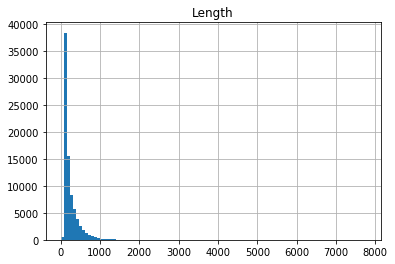

In [16]:
# Construct a histogram of returned sequence lengths
df.hist('Length', bins=100);

and grouping/subsetting:

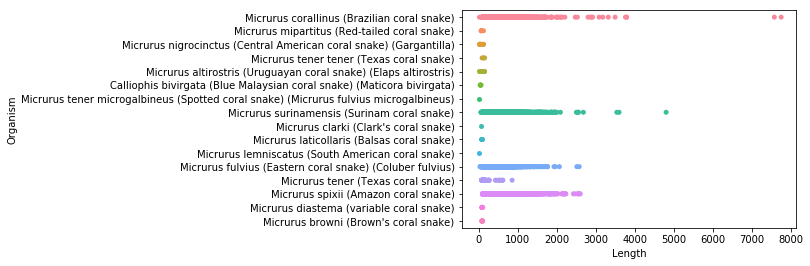

In [17]:
# Subset out coral snakes
coral = df.loc[df["Organism"].str.contains("coral")]

# Plot a strip plot of sequence size by organism in the dataframe
output = sns.stripplot(y="Organism", x="Length",
                       data=coral)  # Render strip plot

<img src="../images/exercise.png" style="width: 100px; float: left;">
<a id="ex03"></a>
### Exercise 03 (10min)

Can you use `bioservices`, `UniProt` and `pandas` to:

<p></p>
<div class="alert-danger">
<ul>
<li> download a dataframe for all proteins that have "rxlr" in their name
<li> render a violin plot (`sns.violinplot()`) that shows the distribution of protein lengths grouped according to the evidence for the protein
</ul>
</div>

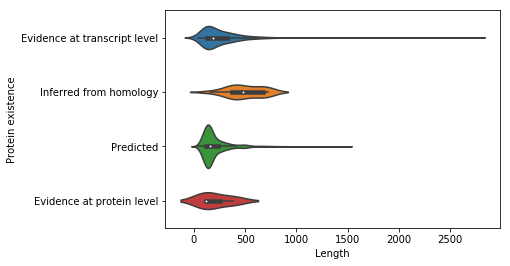

In [18]:
# SOLUTION - EXERCISE 03

# Get dataframe
df = service.get_df('name:rxlr')

# Draw violin plot
output = sns.violinplot(y="Protein existence", x="Length", data=df)